# Predicting heart diesease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in am attempt to build a machine learning models capable of predicting whether or not someone has heart disease based on their medical attributes.


## Problem Statement

> Given clinical parameters about a patient, can we predivt whether or not they have heart disease?

### Preparing the tools

We are going to use Pandas, Numpy and Matplotlib for data analysis and manipulation.

In [97]:
# Importing tools

# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

### Loading the data

In [28]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # rows amd columns

(303, 14)

### Data Exploration

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

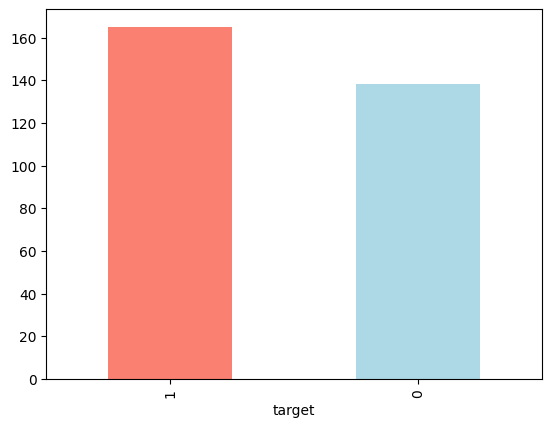

In [7]:
df["target"].value_counts().plot(kind="bar", 
                                 color=["salmon", "lightblue"]);

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
# Checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease frequency according to sex

In [33]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [34]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


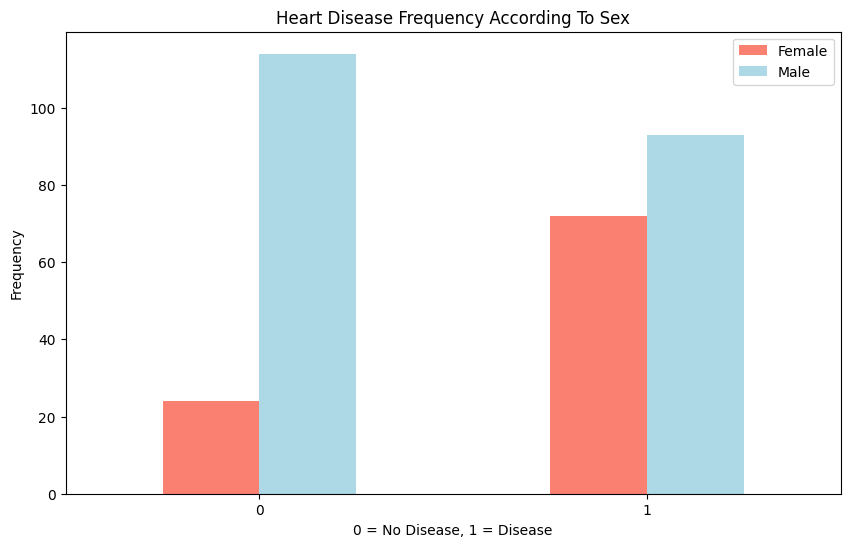

In [35]:
# Plotting the crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=[10, 6], 
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency According To Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

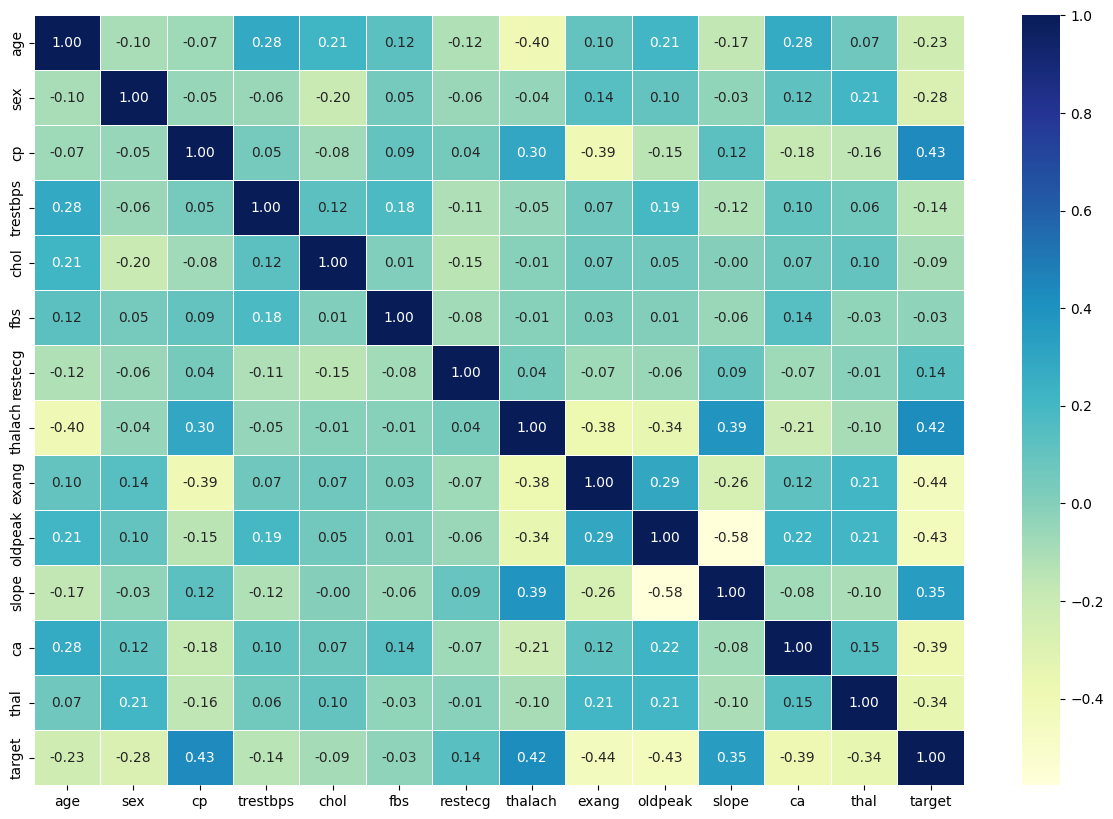

In [36]:
# Correlation Matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

### Modelling

In [41]:
# Split data into x and y

x = df.drop("target", axis=1)
y = df["target"]

In [42]:
# Split data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

#### Models used:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [45]:
# Models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Function to fit and score the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary for model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        
        # Evaluate the model and append the scores to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores    

In [46]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\User\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7377049180327869,
 'Random Forest': 0.8524590163934426}

### Model Comparison

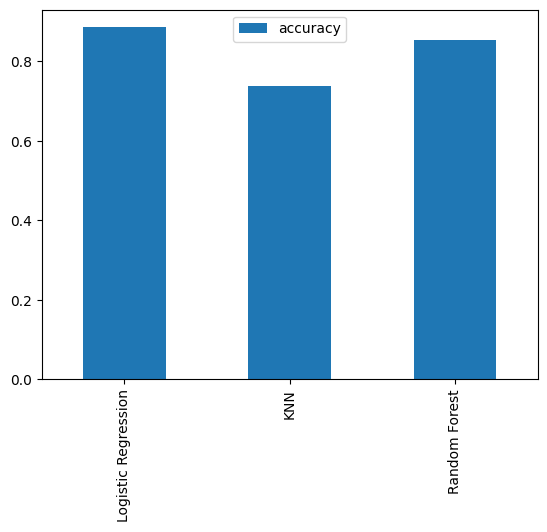

In [48]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning ( manually)

In [50]:
# Tuning KNN

train_scores = []
test_scores = []

# List of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [52]:
train_scores

[1.0,
 0.8057851239669421,
 0.7520661157024794,
 0.768595041322314,
 0.7644628099173554,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.7066115702479339,
 0.7107438016528925,
 0.7107438016528925,
 0.6900826446280992,
 0.6611570247933884,
 0.6570247933884298,
 0.6859504132231405,
 0.6611570247933884,
 0.6735537190082644,
 0.6652892561983471,
 0.6570247933884298,
 0.6652892561983471]

In [51]:
test_scores

[0.5573770491803278,
 0.5245901639344263,
 0.7049180327868853,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7540983606557377,
 0.7049180327868853,
 0.7377049180327869,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.8032786885245902,
 0.7704918032786885]

### Hyperparameter Tuning ( using RandomisedSearchCV)

In [59]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Hyperparameter grid for Random Forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [60]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random Hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameter search model for Logistic Regression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [62]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [63]:
# Tune Random Forest
np.random.seed(42)

# Setup random Hyperparameter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameter search model for Random Forest
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [64]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [65]:
rs_rf.score(x_test, y_test)

0.8688524590163934

### Hyperparameter Tuning ( using GridSearchCV)

In [70]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup random Hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit random Hyperparameter search model for Logistic Regression
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [71]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [72]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

### Evaluation our model

In [73]:
# Make prediction with tuned moel
y_preds = gs_log_reg.predict(x_test)

In [74]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [75]:
y_test

115    1
291    0
58     1
81     1
35     1
      ..
3      1
118    1
131    1
206    0
254    0
Name: target, Length: 61, dtype: int64

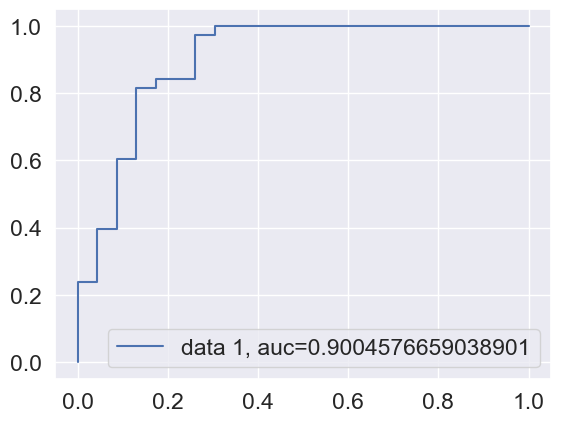

In [100]:
# Plot ROC Curve and calculate AUC metric
y_preds_proba = gs_log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_preds_proba)
auc = roc_auc_score(y_test, y_preds_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

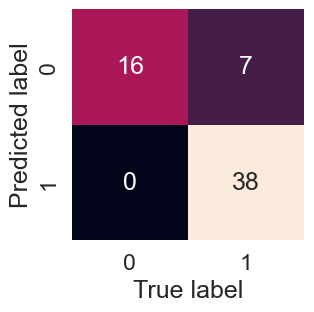

In [81]:
# Confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)    

In [83]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       0.84      1.00      0.92        38

    accuracy                           0.89        61
   macro avg       0.92      0.85      0.87        61
weighted avg       0.90      0.89      0.88        61



### Evaluation metrices using cross validation

In [85]:
# New classifier with best parameters
clf = LogisticRegression(C= 0.38566204211634725, 
                         solver="liblinear")

In [87]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [89]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [90]:
# Cross validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [91]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [93]:
# Cross validated f1 score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

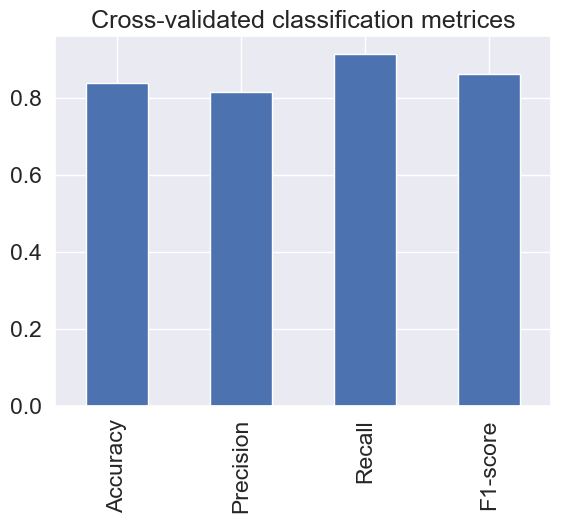

In [96]:
# Visualize cross-valdated metrices
cv_metrices = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1-score": cv_f1},
                           index=[0])

cv_metrices.T.plot.bar(title="Cross-validated classification metrices",
                       legend=False);

### Feature Importance

In [101]:
# fit an instance of Logistic regression
clf.fit(x_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [102]:
# Check coefficient
clf.coef_

array([[ 2.05718604e-04, -8.77949103e-01,  8.09062117e-01,
        -1.04969253e-02, -3.88193654e-04, -1.80353201e-01,
         4.66334989e-01,  2.19472224e-02, -6.65334778e-01,
        -5.66074815e-01,  3.84946103e-01, -6.73591856e-01,
        -6.70070640e-01]])

In [103]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.00020571860364639418,
 'sex': -0.8779491029185951,
 'cp': 0.8090621171394339,
 'trestbps': -0.01049692525461184,
 'chol': -0.00038819365370174134,
 'fbs': -0.18035320115825298,
 'restecg': 0.4663349889886928,
 'thalach': 0.021947222401476157,
 'exang': -0.6653347778212865,
 'oldpeak': -0.5660748146821926,
 'slope': 0.38494610310302707,
 'ca': -0.6735918560229798,
 'thal': -0.6700706399473411}

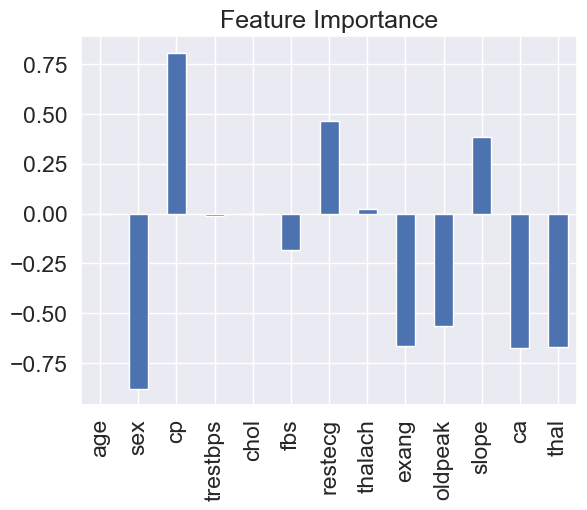

In [104]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);